In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from fpdf import FPDF

In [2]:
df_definitive = pd.read_csv(f'../data/processed/definitive_dataframe.csv')
columns = ['name', 'gender', 'age', 'worth_amount_(BUSD)', 'country', 'company_sector', 'company_name', 'GDP_per_capita_USD']
df_forbeslist_gdp = df_definitive[columns]
df_forbeslist_gdp.head()

,name,gender,age,worth_amount_(BUSD),country,company_sector,company_name,GDP_per_capita_USD
0,Jeff Bezos,M,54.0,112.0,United States,Technology,Amazon,62641
1,Bill Gates,M,62.0,90.0,United States,Technology,Microsoft,62641
2,Warren Buffett,M,87.0,84.0,United States,Finance and Investments,Berkshire Hathaway,62641
3,Mark Zuckerberg,M,33.0,71.0,United States,Technology,Facebook,62641
4,Charles Koch,M,82.0,60.0,United States,Diversified,Koch Industries,62641


In [3]:
#5 richest people of the list given the country.

def richest_people(dataframe, country):
    filter_country = dataframe['country'] == country
    result = dataframe[filter_country].nlargest(5, 'worth_amount_(BUSD)')
    return result

In [4]:
plot1 = richest_people(df_forbeslist_gdp, 'Mexico')

In [5]:
plot1

,name,gender,age,worth_amount_(BUSD),country,company_sector,company_name,GDP_per_capita_USD
603,Carlos Slim Helu,M,78.0,67.1,Mexico,Telecom,telecom,9698
604,German Larrea Mota Velasco,M,64.0,17.3,Mexico,Metals & Mining,mining,9698
605,Alberto Bailleres Gonzalez,M,86.0,10.7,Mexico,Metals & Mining,mining,9698
606,Ricardo Salinas Pliego,M,62.0,7.1,Mexico,Fashion & Retail,"retail, media",9698
607,Maria Asuncion Aramburuzabala,F,55.0,5.9,Mexico,Food and Beverage,"beer, investments",9698


In [6]:
label1 = plot1['name']
BUSD1 = plot1['worth_amount_(BUSD)']

In [11]:
def plot1_bar_x():
    plt.figure(figsize=(15,4))
    index = np.arange(len(label1))
    plt.bar(index, BUSD1)
    plt.ylabel('Billions of USD', fontsize=12)
    plt.xticks(index, label1, fontsize=10, rotation=0)
    country = plot1['country'].unique()[0]
    plt.title(f'The 5 richest people in {country} according to Forbes List (2018)', fontsize=20)
    plt.savefig(f'../data/results/5richest.png')
    return plt.show()

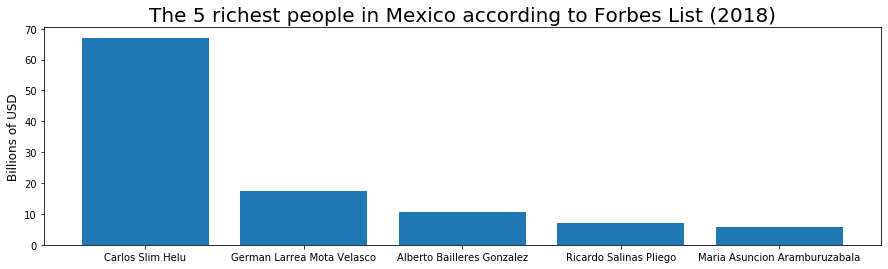

In [12]:
plot1_bar_x()

In [ ]:
#country gdp compared to the average world's gdp

def country_gdp(dataframe, country):
    filter_country = df_forbeslist_gdp['country'] == country
    gdp_country_array = df_forbeslist_gdp[filter_country]['GDP_BUSD'].unique()
    gdp_country = gdp_country_array[0]
    gdp_unique = dataframe['GDP_BUSD'].unique()
    gdp_mean = round(gdp_unique.mean(), 1)
    list_country_gdp = [gdp_country, gdp_mean]
    return list_country_gdp

In [ ]:
list_country_gdp = country_gdp(df_forbeslist_gdp, 'Mexico')

In [ ]:
label = ['Mexico GDP', 'Average GDP']
BUSD = list_country_gdp

In [ ]:
def plot2_bar_x():
    plt.figure(figsize=(15,4))
    index = np.arange(len(label))
    plt.bar(index, BUSD)
    plt.ylabel('Billions of USD', fontsize=12)
    plt.xticks(index, label, fontsize=12, rotation=0)
    country = label[0]
    plt.title(f'{country} compared to Average GDP (2018)', fontsize=16)
    plt.savefig(f'../data/results/gdpcountry.png')
    return plt.show()

In [ ]:
plot2_bar_x()

In [ ]:
#gdp per capita compare to the average world's gdp per capita

def gdp_per_capita(dataframe, country):
    filter_country = df_forbeslist_gdp['country'] == country
    gdp_percapita_array = df_forbeslist_gdp[filter_country]['GDP_per_capita_USD'].unique()
    gdp_percapita = gdp_percapita_array[0]
    gdp_percapita_unique = dataframe['GDP_per_capita_USD'].unique()
    gdp_percapita_mean = round(gdp_percapita_unique.mean(), 1)
    list_gdp_percapita = [gdp_percapita, gdp_percapita_mean]
    return list_gdp_percapita

In [ ]:
list_gdp_percapita = gdp_per_capita(df_forbeslist_gdp, 'Mexico')

In [ ]:
label = ['Mexico GDP per capita', 'Average GDP per capita']
BUSD = list_gdp_percapita

In [ ]:
def plot3_bar_x():
    plt.figure(figsize=(15,4))
    index = np.arange(len(label))
    plt.bar(index, BUSD)
    plt.ylabel('USD', fontsize=12)
    plt.xticks(index, label, fontsize=12, rotation=0)
    country = label[0]
    plt.title(f'{country} compared to Average GDP per capita (2018)', fontsize=16)
    plt.savefig(f'../data/results/gdppercapita.png')
    return plt.show()

In [ ]:
plot3_bar_x()

In [ ]:
def create_pdf():
    pdf = FPDF(orientation='P', unit='mm', format='A4')
    pdf.add_page()
    pdf.set_font("Arial", size=20)
    pdf.cell(3.0,1.0,'Forbes List and GDP report 2018')
    pdf.ln(6)
    images = [f'../data/results/5richest.png', f'../data/results/gdpcountry.png', f'../data/results/gdppercapita.png']
    for image in images:
        pdf.image(image, w=pdf.w/1, h=pdf.h/3.5)
        pdf.ln(0.15)
    pdf.output(f'../data/results/report.pdf')
    return "PDF successfully created. You can find the report in the results folder"

In [ ]:
create_pdf()